In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils as ut

In [2]:
df = pd.read_csv('./results/sim/joint_benchmarks.csv', index_col=0)
df = ut.extract_cols(df)
df['id'] = df.apply(lambda x: x['id'].upper(), axis=1)

/home/damian/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (24,26,27,28,29,33,34,39,41,42,43,44,45,47,48,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# across or per or none
flag = 'none'
xlabel = '$SHD_{norm}$'

if flag == 'per':
    # scale "per algorithm"
    df['SHD_norm'] = df.groupby(['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n'])['SHD_pattern'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
elif flag == 'across':
    # scale "across algorithms"
    df['SHD_norm'] = df.groupby(['graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n'])['SHD_pattern'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
elif flag == 'none':
    df['SHD_norm'] = df['SHD_pattern']
    xlabel = 'SHD'
else:
    print('wrong flag value!')


def update_xaxis():
    if flag == 'none':
        plt.xscale('symlog', linthresh=1e2, linscale=2.0, subs=[2, 3, 4, 5, 6, 7, 8, 9])
        plt.xlim(-5, 1e4/3)
        plt.xticks([0, 20, 40, 60, 80, 1e2, 1e3], labels=[0, 20, 40, 60, 80, '$10^2$', '$10^3$'])

## All DGPs

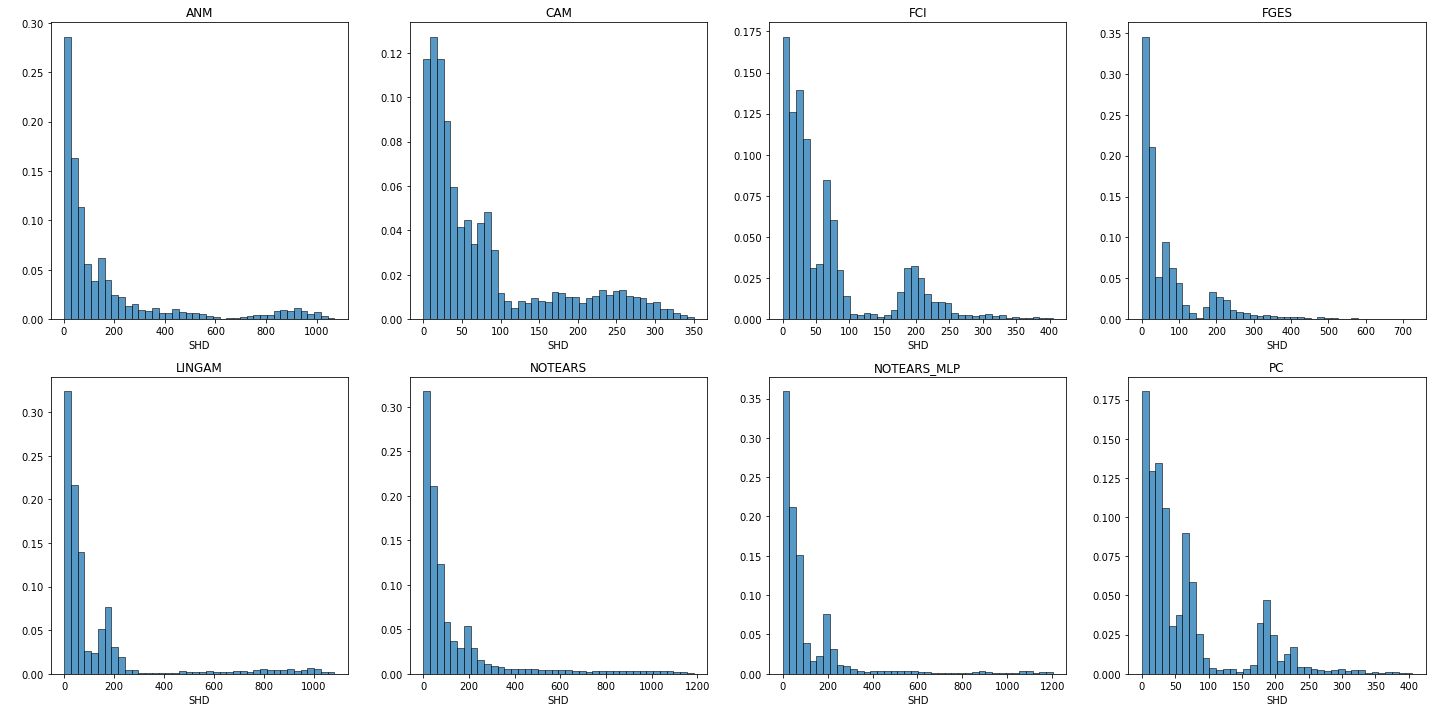

In [5]:
algs = df['id'].unique()
algs.sort()

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=False, sharex=False)
axes = axes.flatten()

for ax, alg in zip(axes, algs):
    ax.set_title(alg)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(' ')
    sns.histplot(df.loc[df['id'] == alg, 'SHD_norm'], ax=ax, stat='probability', bins=40)

plt.tight_layout()
plt.savefig(f'./plots/dist/norm/dist_all_{flag}.pdf', dpi=1000)

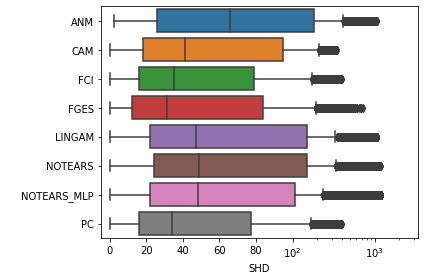

In [5]:
sns.boxplot(data=df, x='SHD_norm', y='id', order=algs).set(ylabel=' ', xlabel=xlabel)

update_xaxis()

plt.tight_layout()
plt.savefig(f'./plots/dist/norm/dist_all_box_{flag}.pdf', dpi=1000)

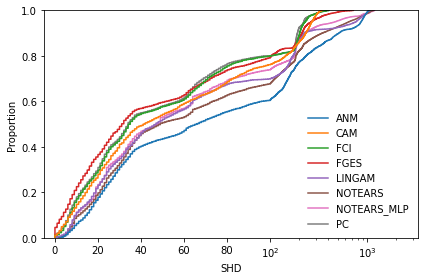

In [8]:
g = sns.ecdfplot(data=df, x='SHD_norm', hue='id', hue_order=algs)
g.set(xlabel=xlabel)
l = g.get_legend()
l.set_title('')
l.set_frame_on(False)

update_xaxis()

plt.tight_layout()
plt.savefig(f'./plots/dist/norm/dist_all_ecdf_{flag}.pdf', dpi=1000)

## Trends

In [19]:
def plot_dist_delta(df, gr):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=False, sharey=False)
    axes = axes.flatten()

    algs = df['id'].unique()
    algs.sort()

    for ax, alg in zip(axes, algs):
        ax.set_title(alg)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(' ')
        sns.histplot(df.loc[df['id'] == alg], x='SHD_norm', hue=gr, ax=ax, stat='probability', bins=40, palette='deep')

    plt.tight_layout()
    #plt.show()
    plt.savefig(f'./plots/dist/norm/dist_{gr}_{flag}.pdf', dpi=1000)

def plot_box_delta(df, gr):
    algs = df['id'].unique()
    algs.sort()
    sns.catplot(data=df, x='SHD_norm', y='id', hue=gr, kind='box', orient='h', order=algs).set(ylabel=' ', xlabel=xlabel)
    update_xaxis()
    plt.savefig(f'./plots/dist/norm/dist_{gr}_box_{flag}.pdf', dpi=1000)

def plot_ecdf_delta(df, gr):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
    axes = axes.flatten()

    algs = df['id'].unique()
    algs.sort()

    for ax, alg in zip(axes, algs):
        ax.set_title(alg)
        ax.set_xlabel(xlabel)
        sns.ecdfplot(data=df.loc[df['id'] == alg], x='SHD_norm', hue=gr, ax=ax, palette='deep')

    #update_xaxis()
    plt.tight_layout()
    plt.savefig(f'./plots/dist/norm/dist_{gr}_ecdf_{flag}.pdf', dpi=1000)

def plot_ecdf_delta_alt(df, gr):
    algs = df['id'].unique()
    algs.sort()

    g = sns.displot(data=df, x='SHD_norm', hue='id', col=gr, kind='ecdf', hue_order=algs)
    g.set(xlabel=xlabel)
    sns.move_legend(g, 'center right', bbox_to_anchor=(1, .3), title='')

    update_xaxis()
    plt.tight_layout()
    plt.savefig(f'./plots/dist/norm/dist_{gr}_ecdf_alt_{flag}.pdf', dpi=1000)

def plot_ecdf_delta_alt_vert(df, gr):
    algs = df['id'].unique()
    algs.sort()

    g = sns.displot(data=df, x='SHD_norm', hue='id', row=gr, kind='ecdf', hue_order=algs)
    g.set(xlabel=xlabel)
    sns.move_legend(g, 'lower right', bbox_to_anchor=(1, .08), title='')

    update_xaxis()
    plt.tight_layout()
    plt.savefig(f'./plots/dist/norm/dist_{gr}_ecdf_alt_vert_{flag}.pdf', dpi=1000)

### hist

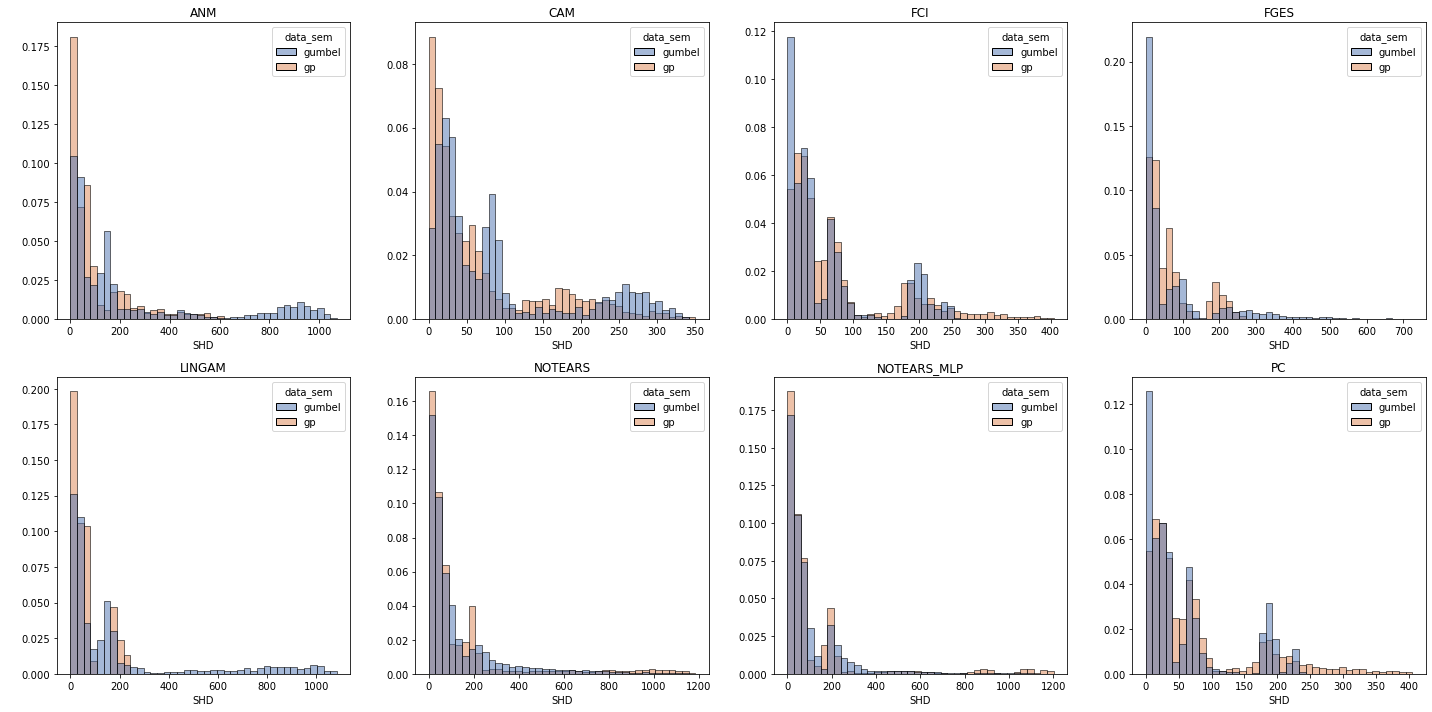

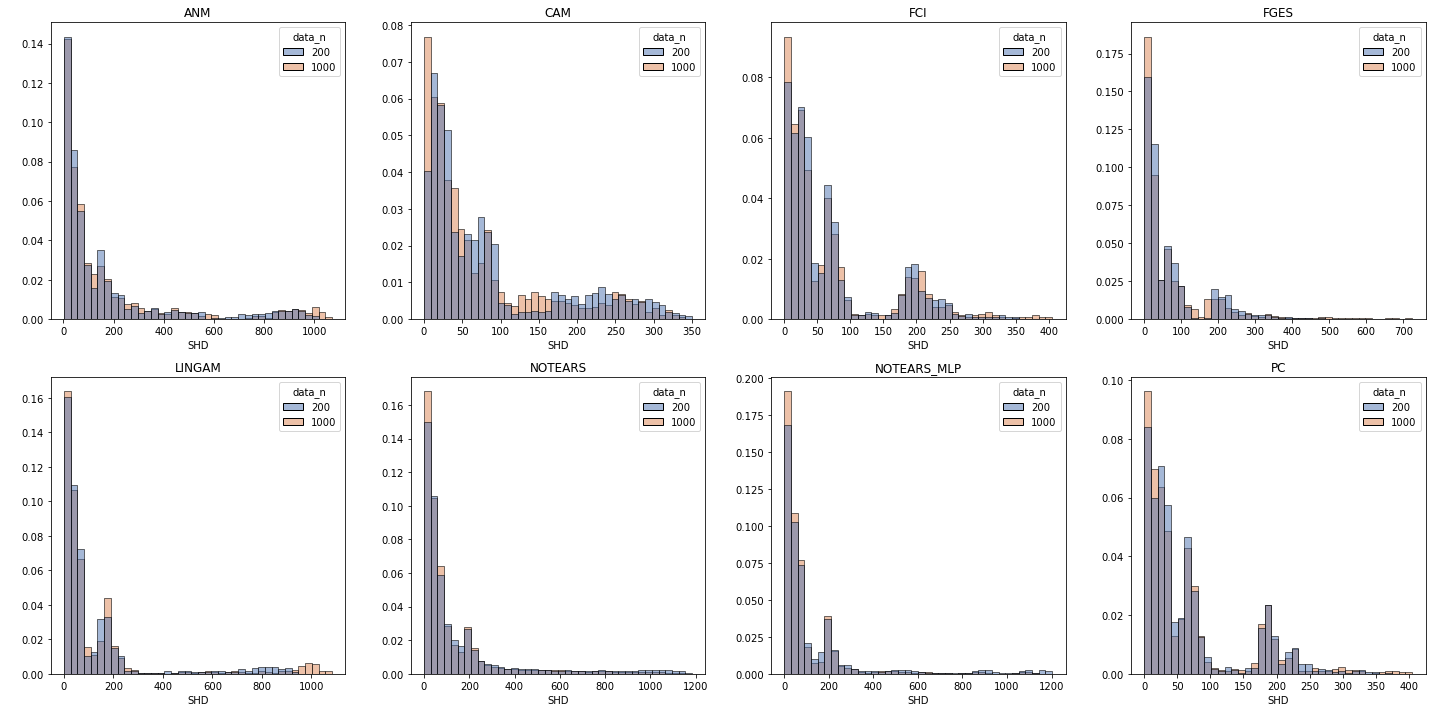

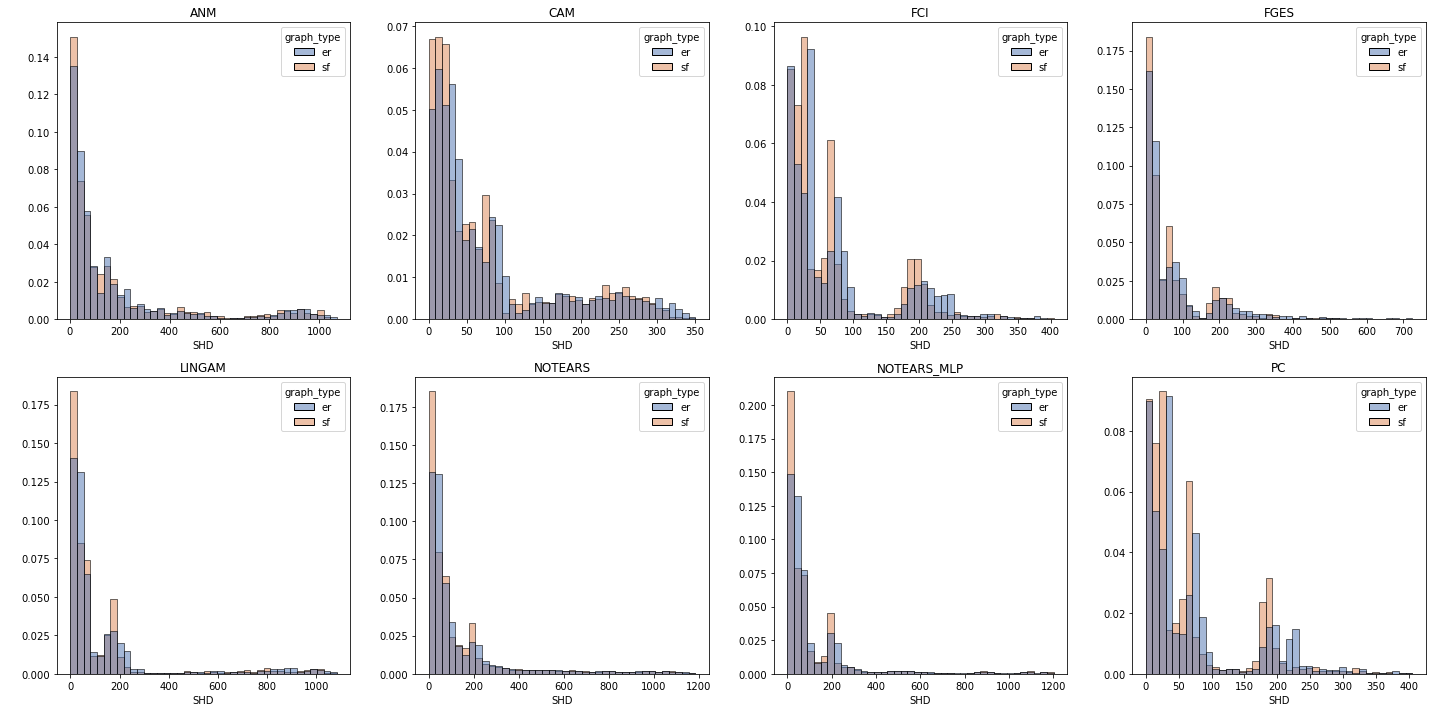

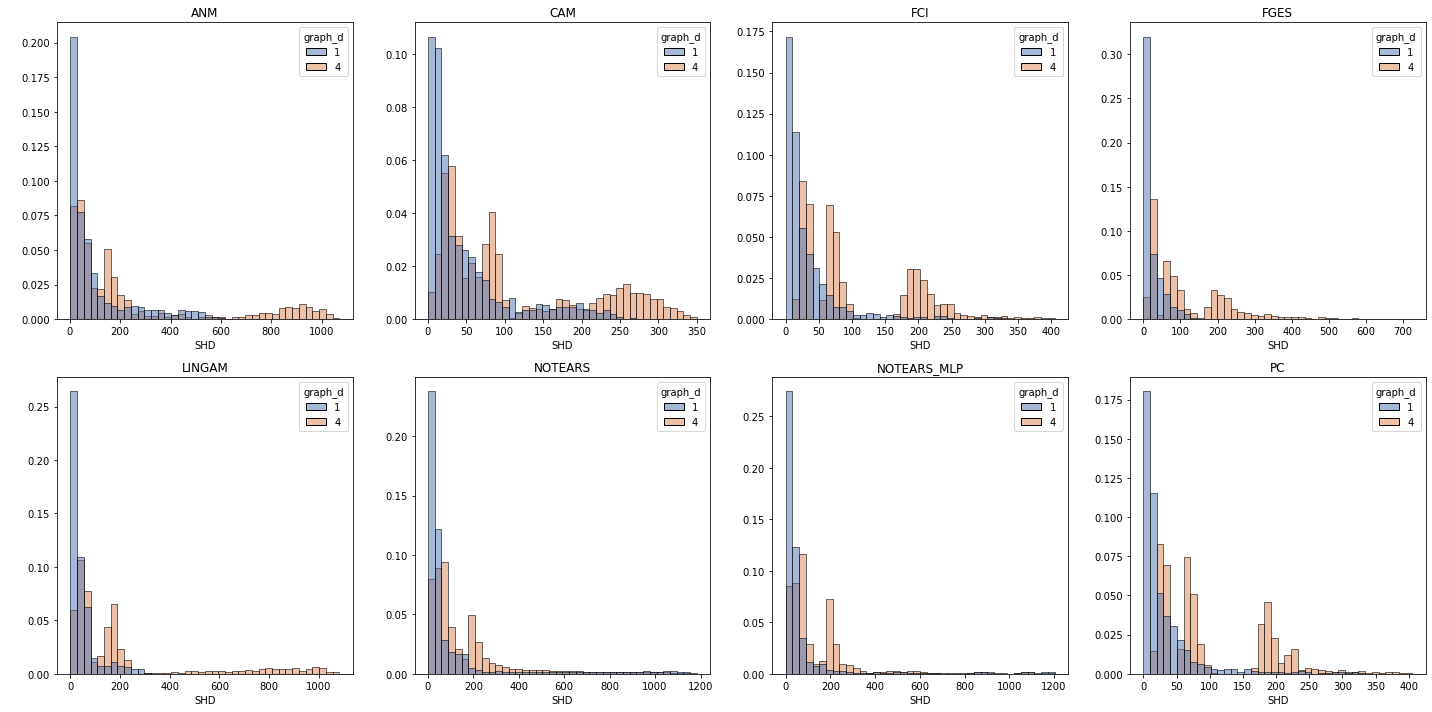

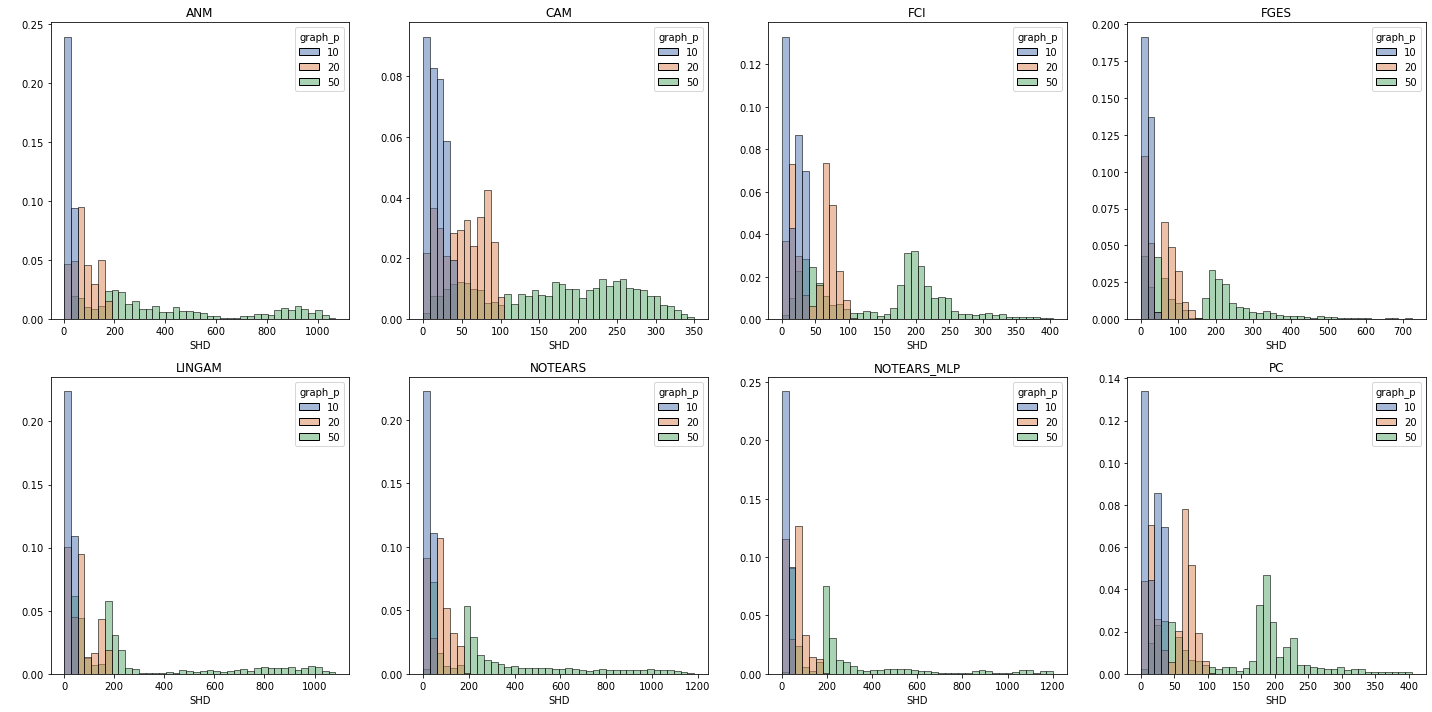

In [14]:
for o in ['data_sem', 'data_n', 'graph_type', 'graph_d', 'graph_p']:
    plot_dist_delta(df, o)

### box

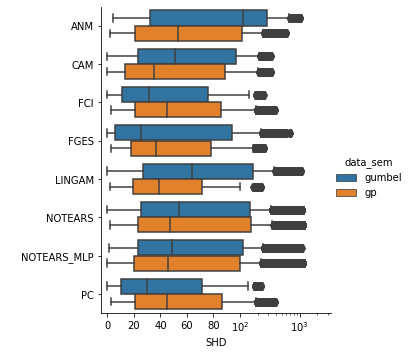

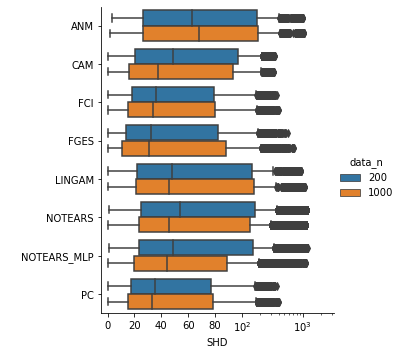

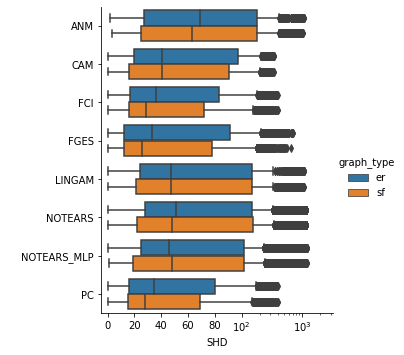

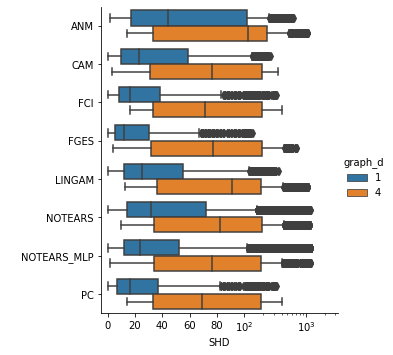

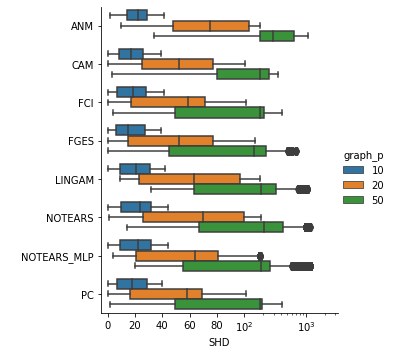

In [15]:
for o in ['data_sem', 'data_n', 'graph_type', 'graph_d', 'graph_p']:
    plot_box_delta(df, o)

### cumulative

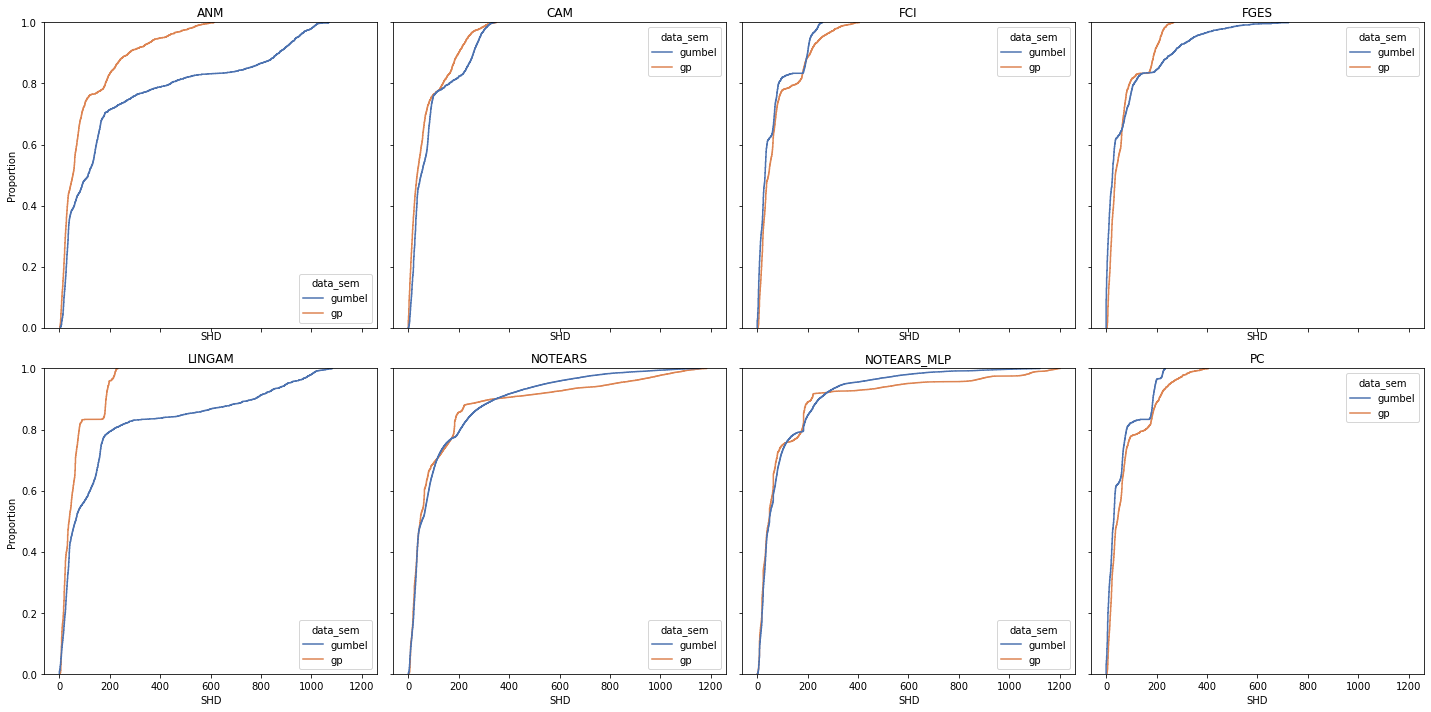

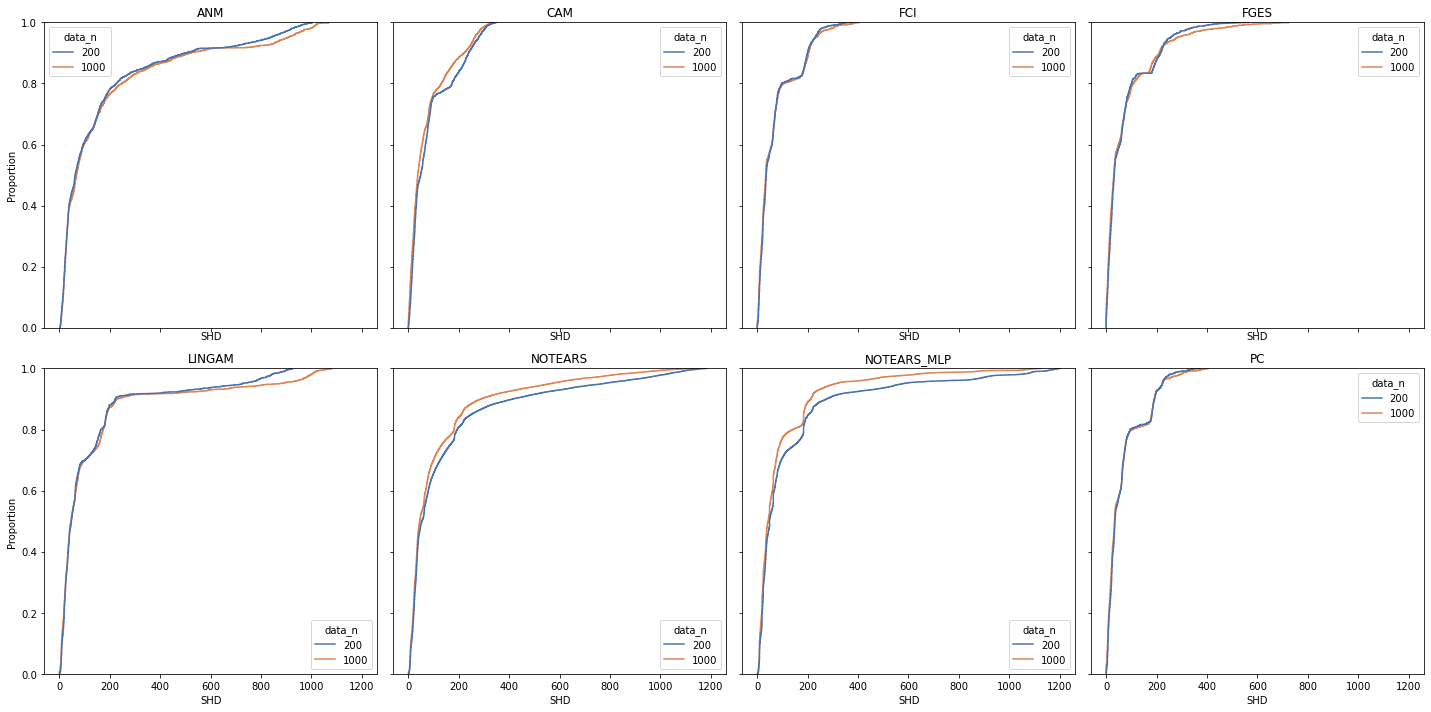

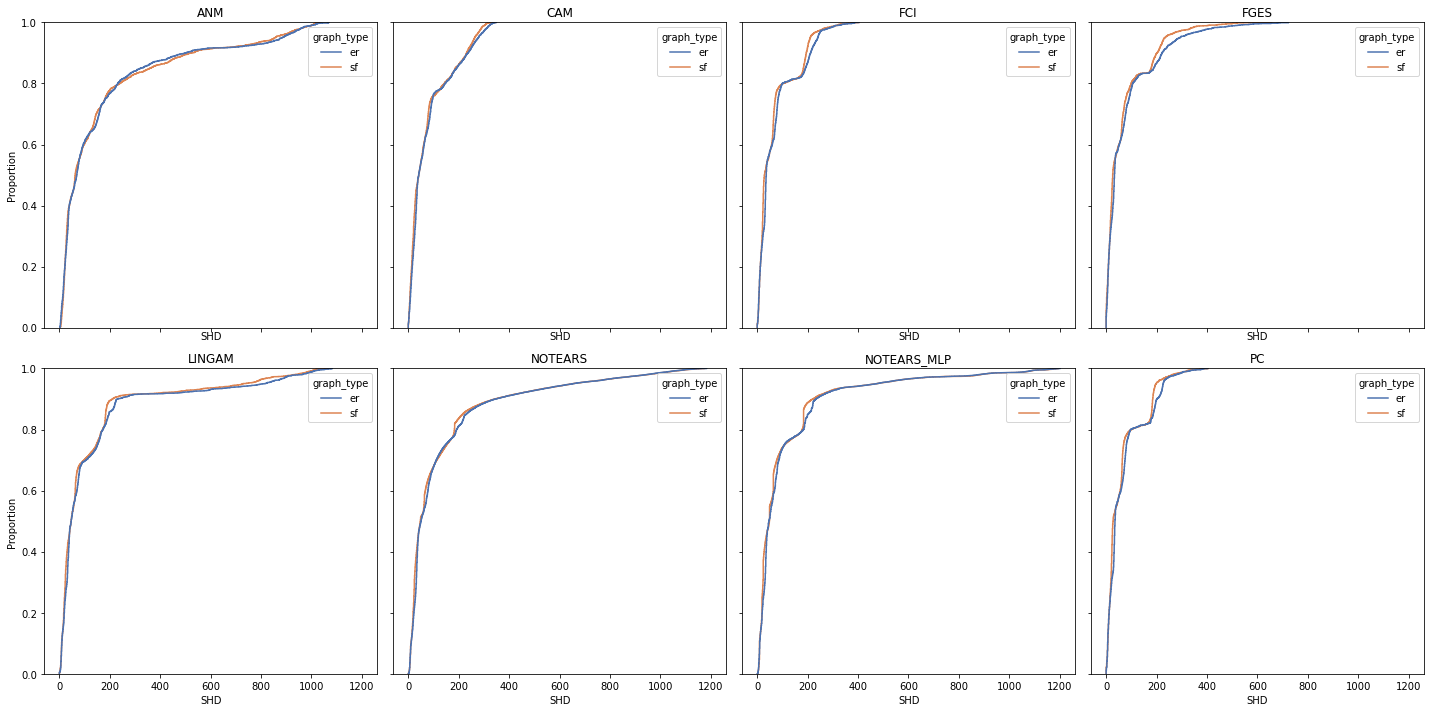

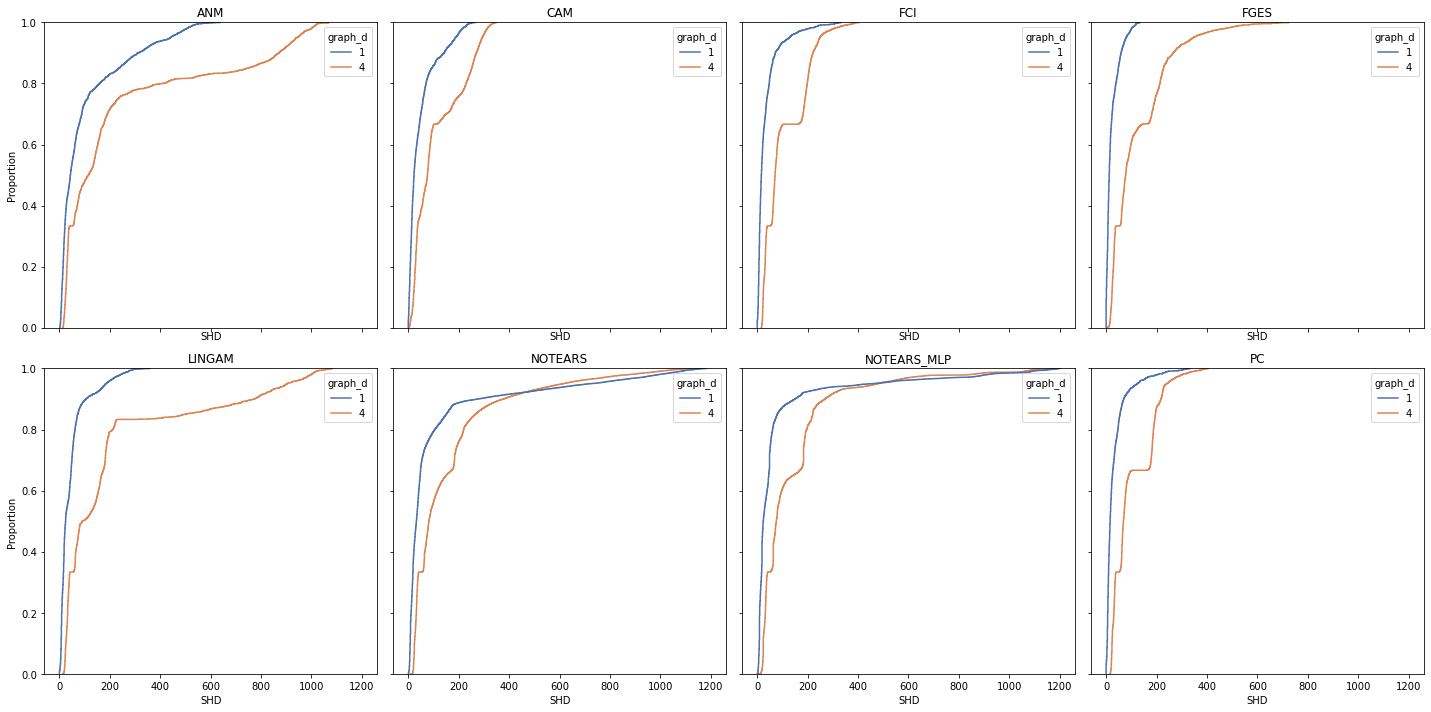

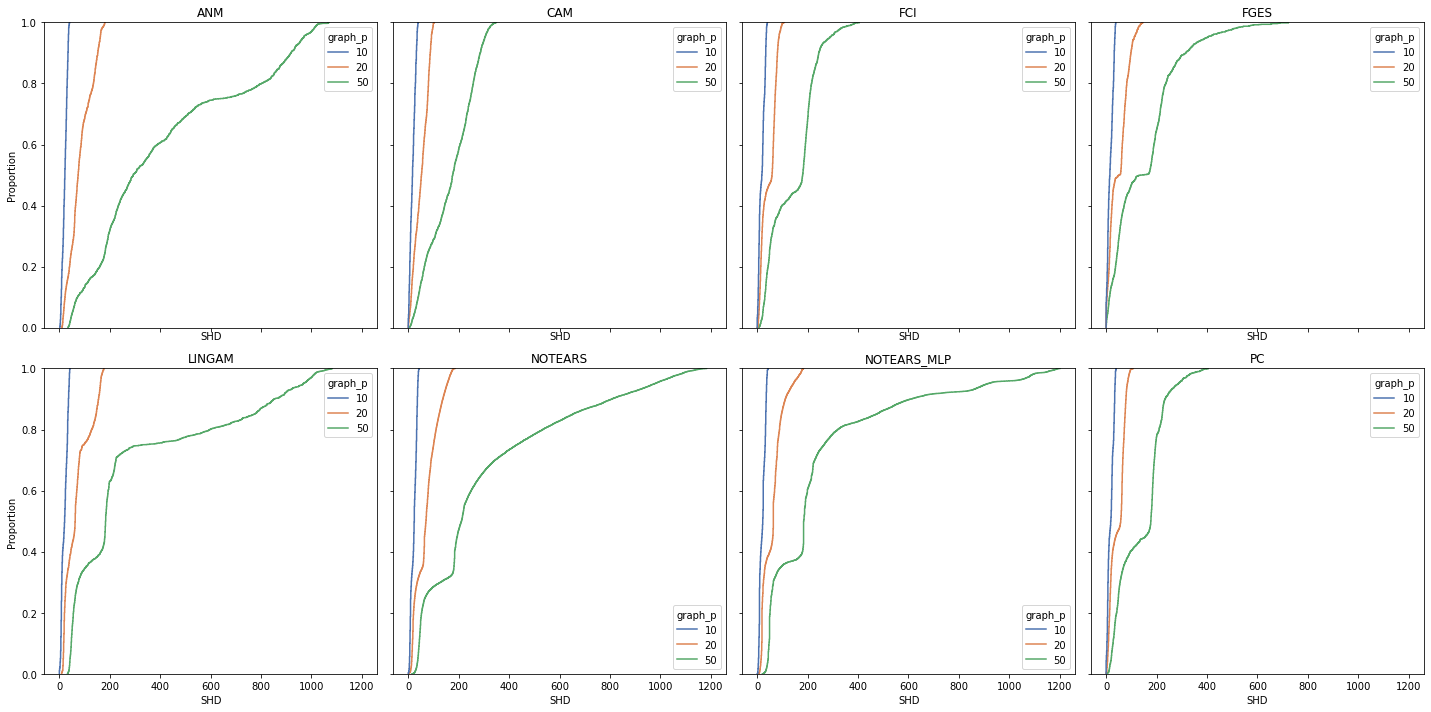

In [67]:
for o in ['data_sem', 'data_n', 'graph_type', 'graph_d', 'graph_p']:
    plot_ecdf_delta(df, o)

### cumulative (alt grouping)

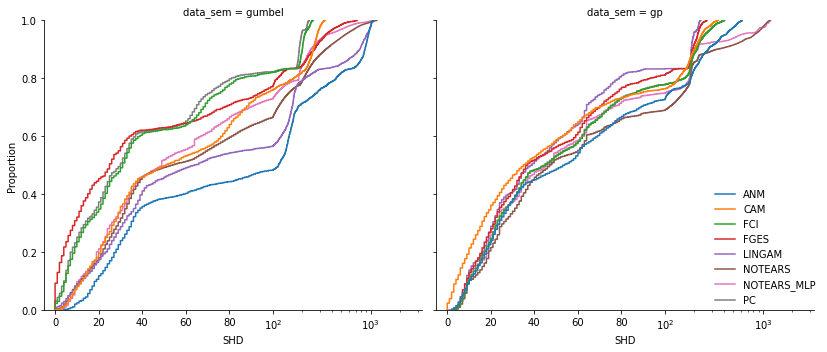

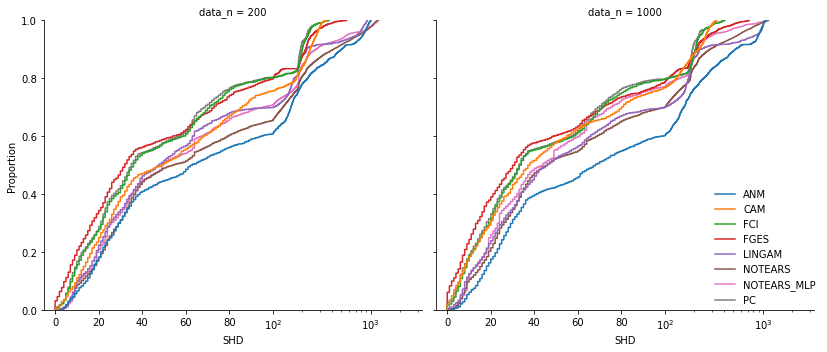

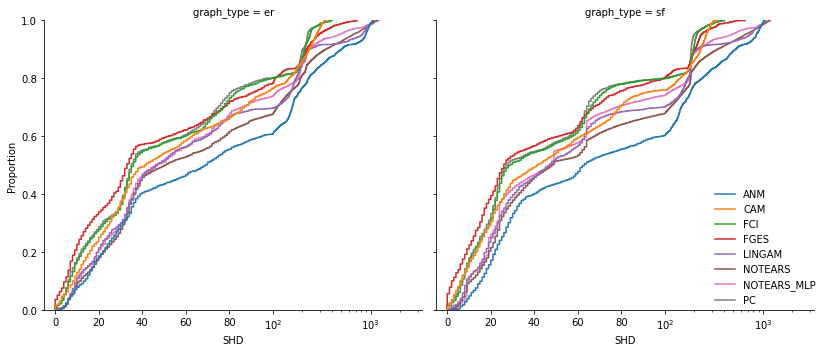

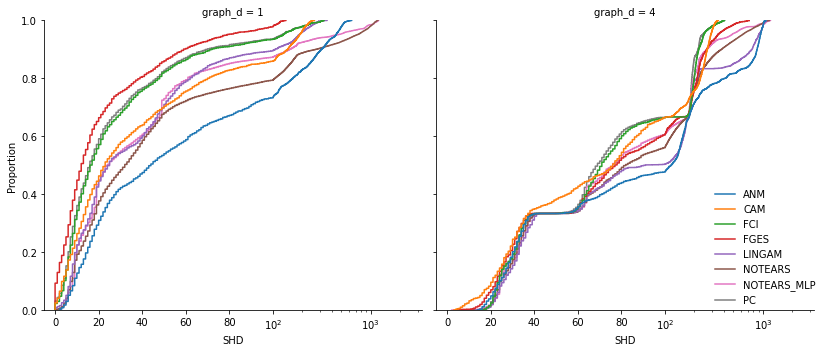

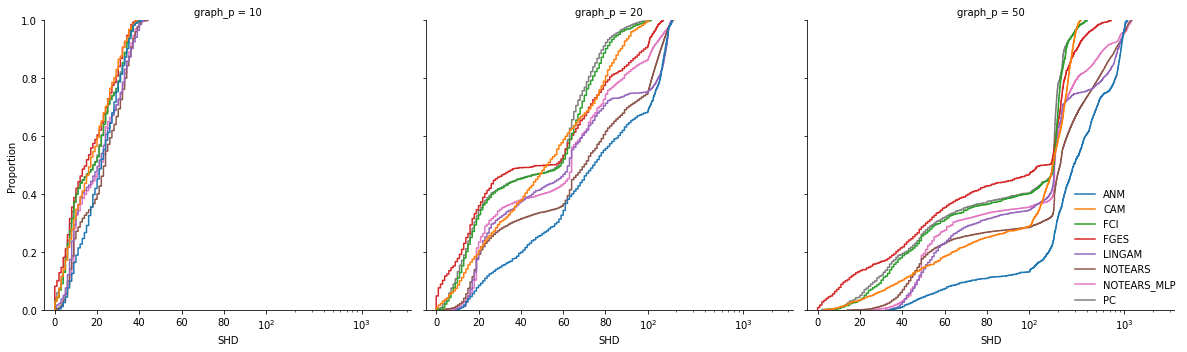

In [20]:
for o in ['data_sem', 'data_n', 'graph_type', 'graph_d', 'graph_p']:
    plot_ecdf_delta_alt(df, o)

### cumulative (alt, vert)

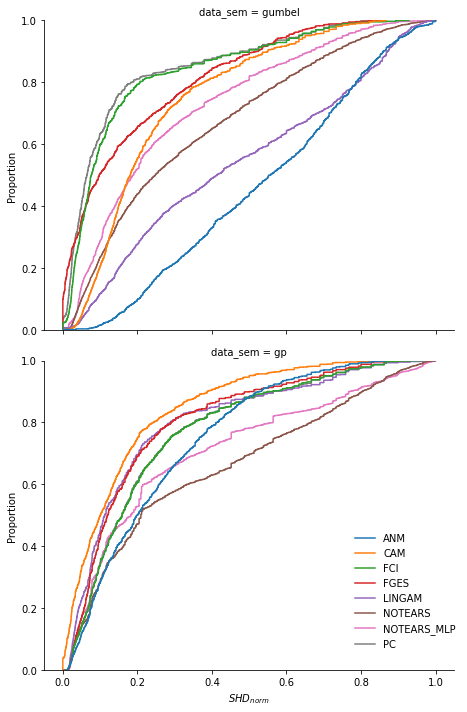

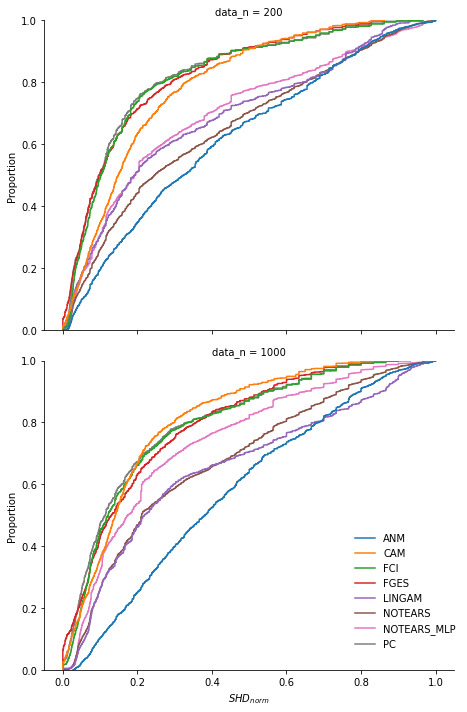

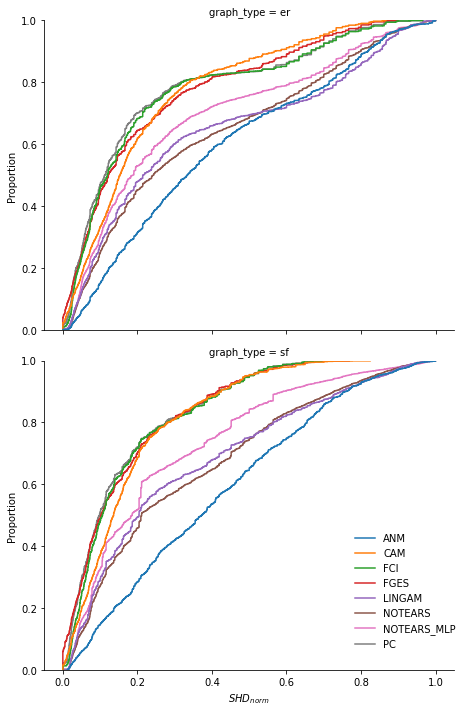

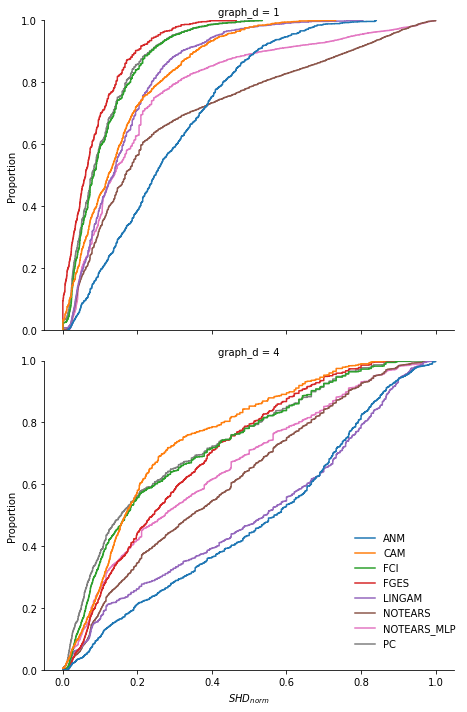

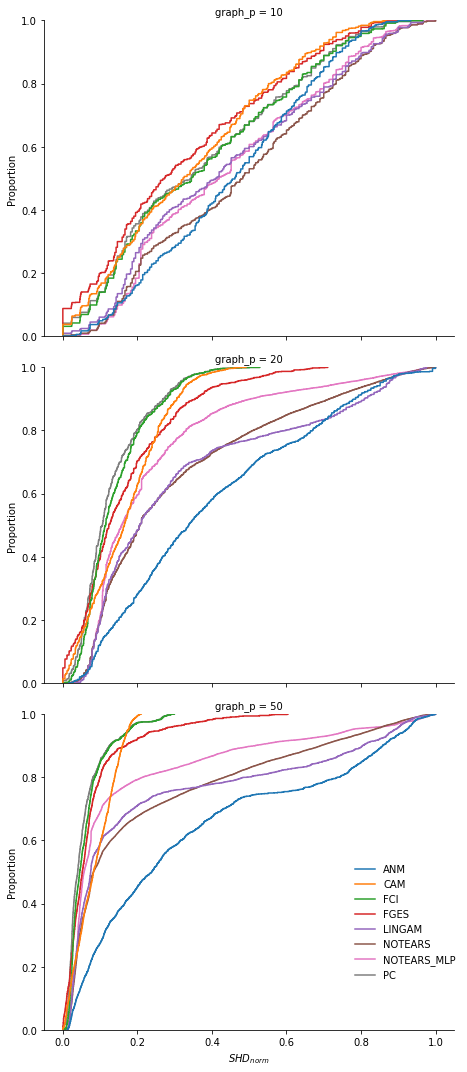

In [43]:
for o in ['data_sem', 'data_n', 'graph_type', 'graph_d', 'graph_p']:
    plot_ecdf_delta_alt_vert(df, o)